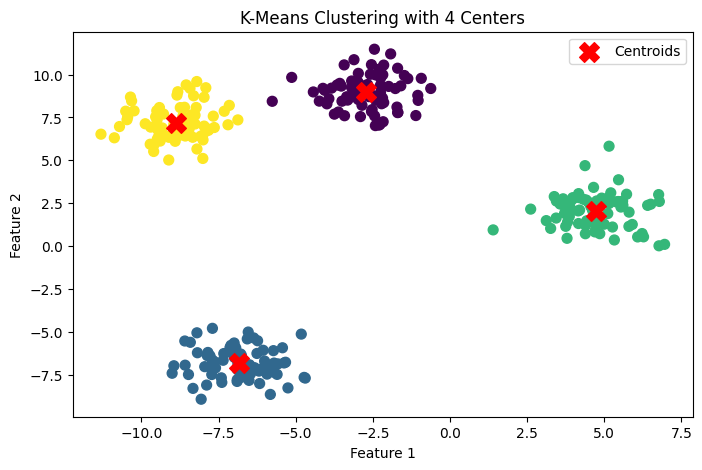

In [ ]:
#21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
#scatter plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)

plt.title("K-Means Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [2]:
#22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
#predicted labels
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
iris = load_iris()
X = iris.data

agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

labels = agglo.fit_predict(X)

labels_df = pd.DataFrame(labels, columns=["Predicted Cluster"])

print("First 10 Predicted Cluster Labels:")
print(labels_df.head(10))


First 10 Predicted Cluster Labels:
   Predicted Cluster
0                  1
1                  1
2                  1
3                  1
4                  1
5                  1
6                  1
7                  1
8                  1
9                  1


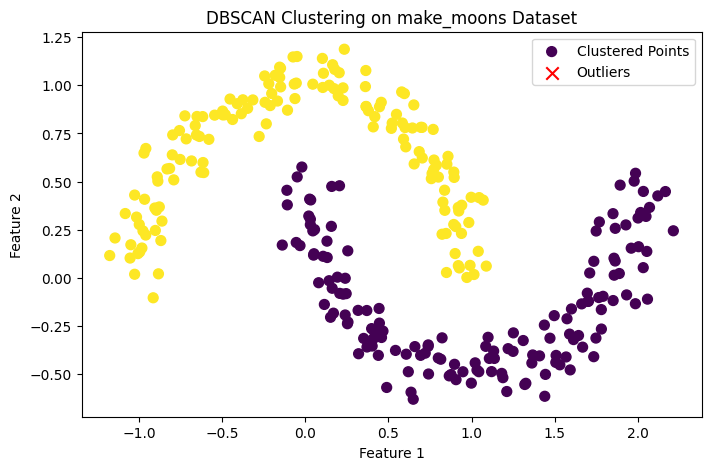

In [3]:
#23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y_true = make_moons(
    n_samples=300,
    noise=0.08,
    random_state=42
)

dbscan = DBSCAN(
    eps=0.25,
    min_samples=5
)

labels = dbscan.fit_predict(X)

outliers = labels == -1

plt.figure(figsize=(8, 5))

# Plot clustered points
plt.scatter(
    X[~outliers, 0],
    X[~outliers, 1],
    c=labels[~outliers],
    cmap='viridis',
    s=50,
    label="Clustered Points"
)

# Plot outliers
plt.scatter(
    X[outliers, 0],
    X[outliers, 1],
    c='red',
    marker='x',
    s=80,
    label="Outliers"
)

plt.title("DBSCAN Clustering on make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [5]:
#24.  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
#cluster
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

cluster_sizes = pd.Series(labels).value_counts().sort_index()

print("Cluster Sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples")


Cluster Sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


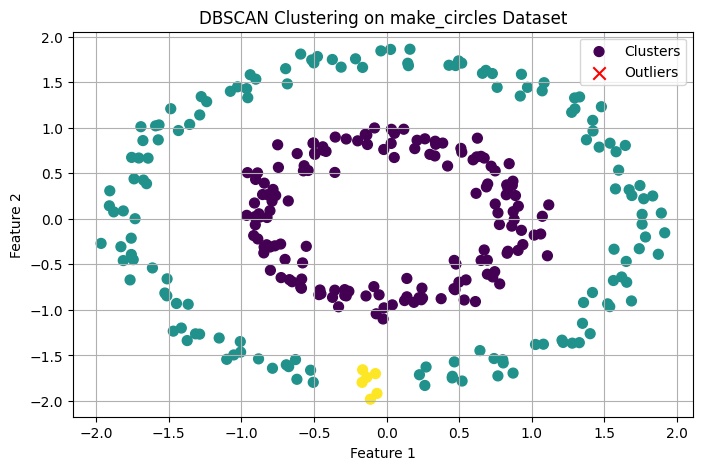

In [6]:
#25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, y_true = make_circles(
    n_samples=300,
    factor=0.5,
    noise=0.05,
    random_state=42
)

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(
    eps=0.3,
    min_samples=5
)

labels = dbscan.fit_predict(X_scaled)

outliers = labels == -1

plt.figure(figsize=(8, 5))

# Plot clustered points
plt.scatter(
    X_scaled[~outliers, 0],
    X_scaled[~outliers, 1],
    c=labels[~outliers],
    cmap='viridis',
    s=50,
    label='Clusters'
)

# Plot outliers
plt.scatter(
    X_scaled[outliers, 0],
    X_scaled[outliers, 1],
    c='red',
    marker='x',
    s=80,
    label='Outliers'
)

plt.title("DBSCAN Clustering on make_circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
#26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
#centroids
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

centroids = kmeans.cluster_centers_

# Convert centroids to DataFrame for readability
centroids_df = pd.DataFrame(
    centroids,
    columns=feature_names
)

print("Cluster Centroids (Scaled Values):")
print(centroids_df)


Cluster Centroids (Scaled Values):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fractal 

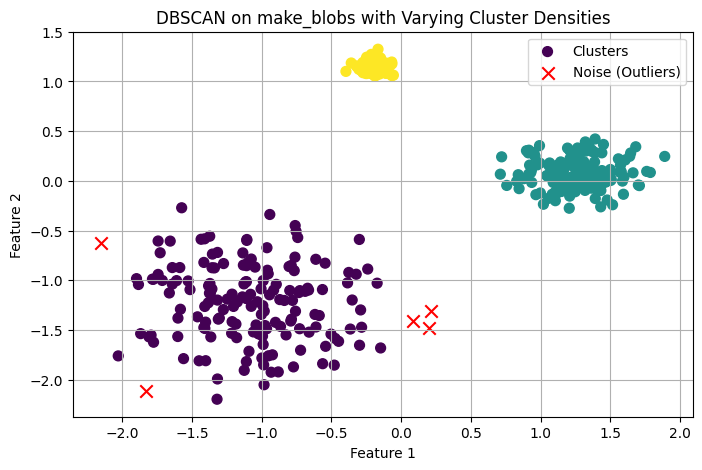

In [8]:
#27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
#DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


X, y_true = make_blobs(
    n_samples=500,
    centers=3,
    cluster_std=[0.3, 1.0, 2.5],
    random_state=42
)

X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(
    eps=0.35,
    min_samples=5
)

labels = dbscan.fit_predict(X_scaled)

noise = labels == -1

plt.figure(figsize=(8, 5))

# Plot clustered points
plt.scatter(
    X_scaled[~noise, 0],
    X_scaled[~noise, 1],
    c=labels[~noise],
    cmap='viridis',
    s=50,
    label='Clusters'
)

# Plot noise points
plt.scatter(
    X_scaled[noise, 0],
    X_scaled[noise, 1],
    c='red',
    marker='x',
    s=80,
    label='Noise (Outliers)'
)

plt.title("DBSCAN on make_blobs with Varying Cluster Densities")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


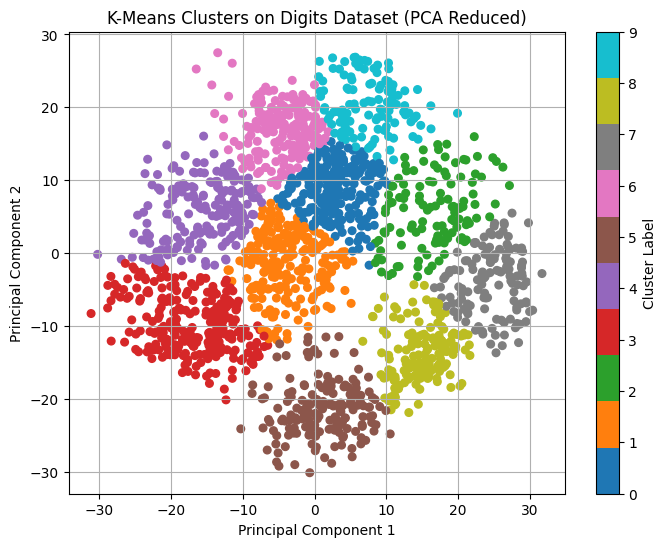

In [9]:
#28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters,
    cmap='tab10',
    s=30
)

plt.title("K-Means Clusters on Digits Dataset (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()


k = 2, Silhouette Score = 0.590
k = 3, Silhouette Score = 0.757
k = 4, Silhouette Score = 0.792
k = 5, Silhouette Score = 0.664


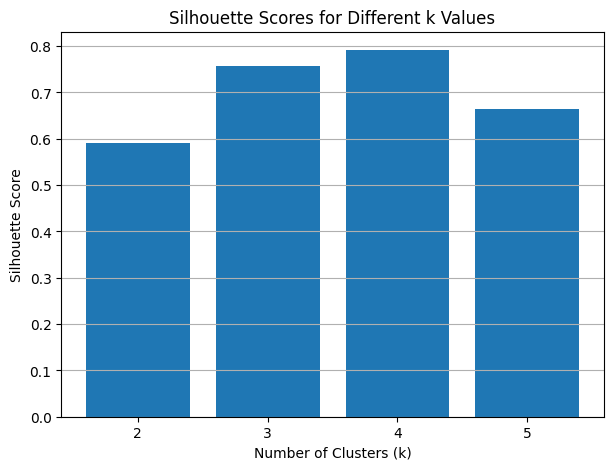

In [10]:
#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

plt.figure(figsize=(7, 5))
plt.bar(k_values, silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k Values")
plt.xticks(k_values)
plt.grid(axis='y')
plt.show()


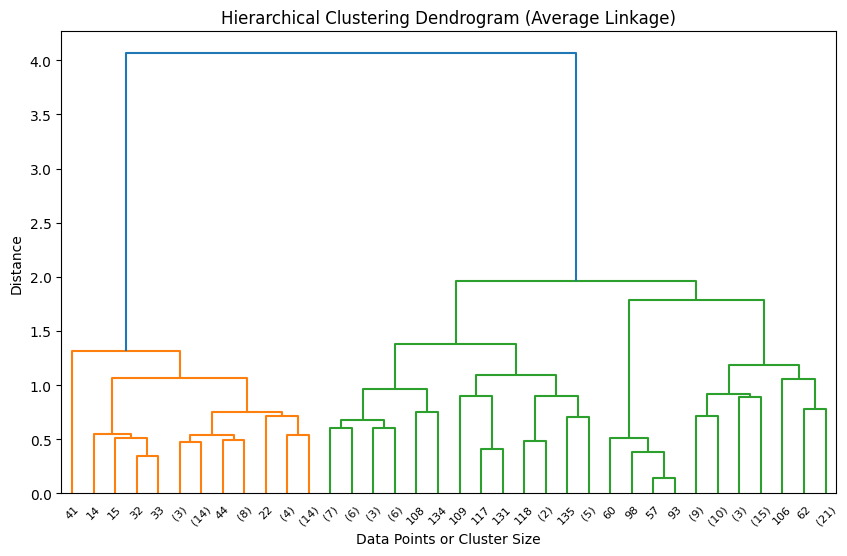

In [11]:
#30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.
#
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data

# Using average linkage
Z = linkage(X, method='average')

plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    truncate_mode='level',  # makes dendrogram readable
    p=5
)

plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Data Points or Cluster Size")
plt.ylabel("Distance")
plt.show()


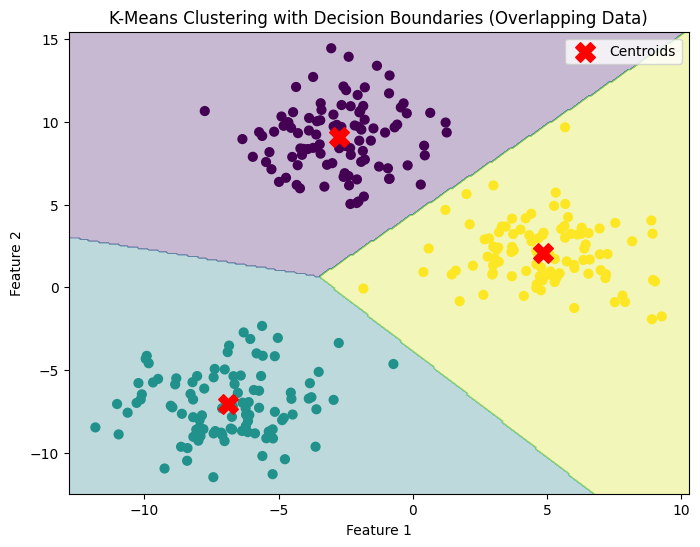

In [12]:
#31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
#decision boundaries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=2.0,
    random_state=42
)


kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)

# Cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)

plt.title("K-Means Clustering with Decision Boundaries (Overlapping Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


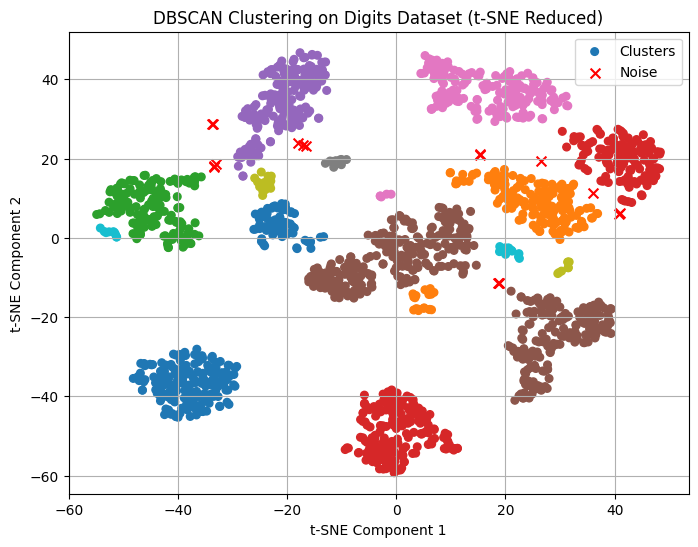

In [14]:
#32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data

X_scaled = StandardScaler().fit_transform(X)


tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)
X_tsne = tsne.fit_transform(X_scaled)

dbscan = DBSCAN(
    eps=3.0,
    min_samples=5
)
labels = dbscan.fit_predict(X_tsne)

noise = labels == -1

plt.figure(figsize=(8, 6))

# Clustered points
plt.scatter(
    X_tsne[~noise, 0],
    X_tsne[~noise, 1],
    c=labels[~noise],
    cmap='tab10',
    s=30,
    label='Clusters'
)

# Noise points
plt.scatter(
    X_tsne[noise, 0],
    X_tsne[noise, 1],
    c='red',
    marker='x',
    s=50,
    label='Noise'
)

plt.title("DBSCAN Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


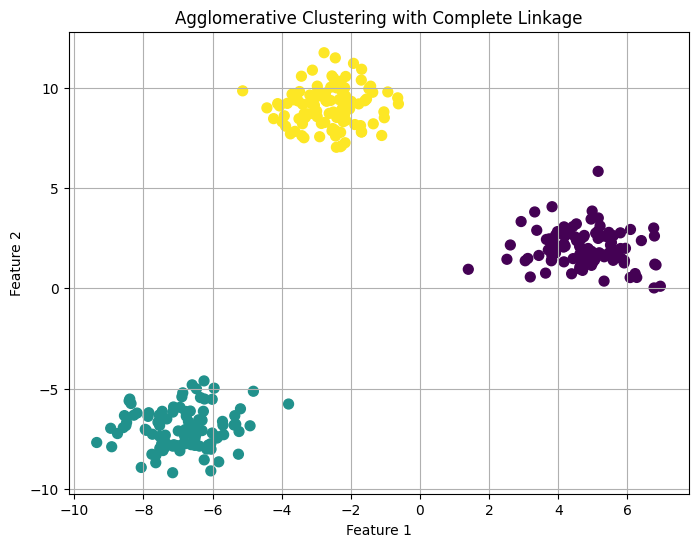

In [15]:
#33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
#the result.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage='complete'
)

labels = agglo.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap='viridis',
    s=50
)

plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


K = 2, Inertia = 11595.68
K = 3, Inertia = 10066.28
K = 4, Inertia = 9266.15
K = 5, Inertia = 9263.40
K = 6, Inertia = 8562.88


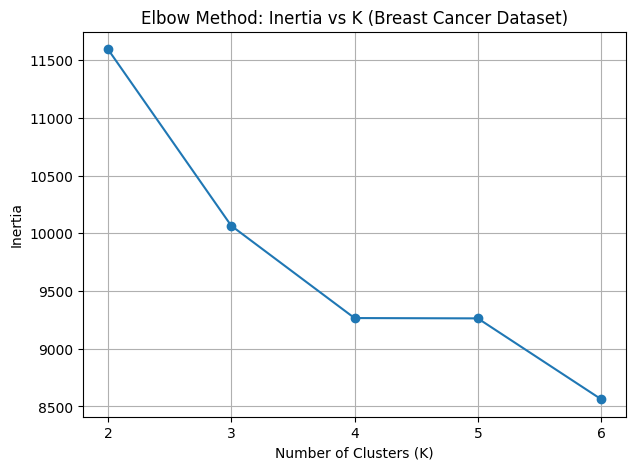

In [16]:
#34.Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
#line plot
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = range(2, 7)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    print(f"K = {k}, Inertia = {kmeans.inertia_:.2f}")

plt.figure(figsize=(7, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method: Inertia vs K (Breast Cancer Dataset)")
plt.xticks(k_values)
plt.grid(True)
plt.show()


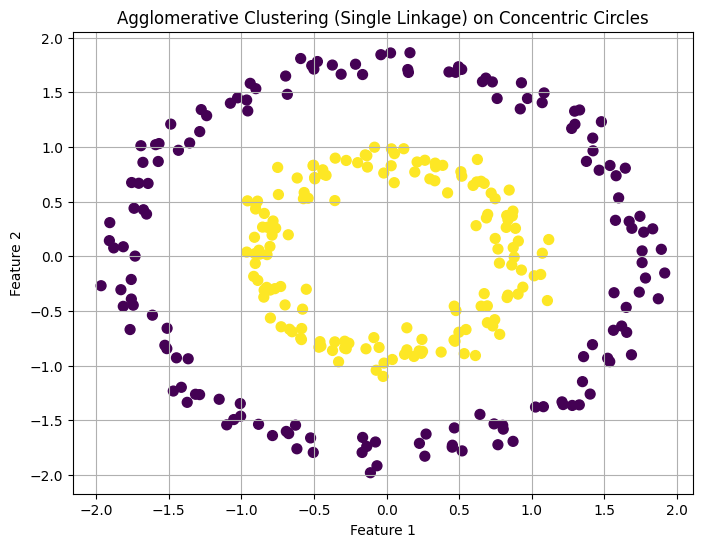

In [17]:
#35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
#single linkage.
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

X, _ = make_circles(
    n_samples=300,
    factor=0.5,
    noise=0.05,
    random_state=42
)

X_scaled = StandardScaler().fit_transform(X)
agglo = AgglomerativeClustering(
    n_clusters=2,
    linkage='single'
)

labels = agglo.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=labels,
    cmap='viridis',
    s=50
)

plt.title("Agglomerative Clustering (Single Linkage) on Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [18]:
#36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
#noise.

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(
    eps=0.9,
    min_samples=5
)

labels = dbscan.fit_predict(X_scaled)

unique_labels = set(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
num_noise = list(labels).count(-1)

print("Number of clusters (excluding noise):", num_clusters)
print("Number of noise points:", num_noise)


Number of clusters (excluding noise): 0
Number of noise points: 178


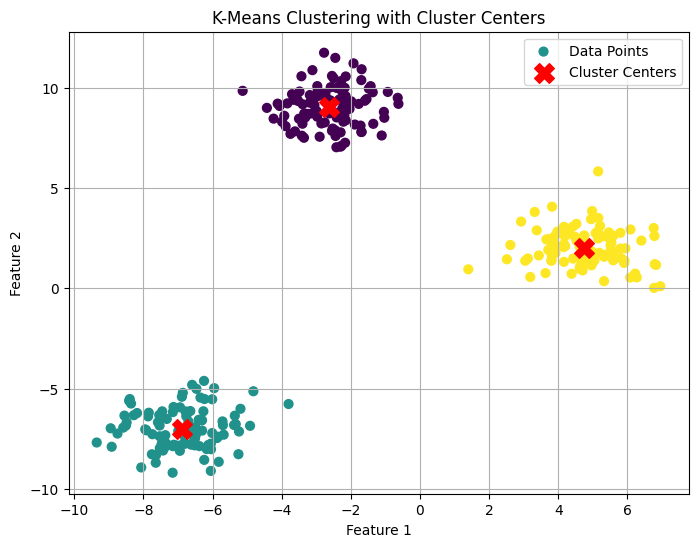

In [19]:
#37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
#data points.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap='viridis',
    s=40,
    label='Data Points'
)

# Plot cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
#38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np


iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dbscan = DBSCAN(
    eps=0.6,
    min_samples=5
)

labels = dbscan.fit_predict(X_scaled)

num_noise = np.sum(labels == -1)

print("Number of samples identified as noise:", num_noise)


Number of samples identified as noise: 26


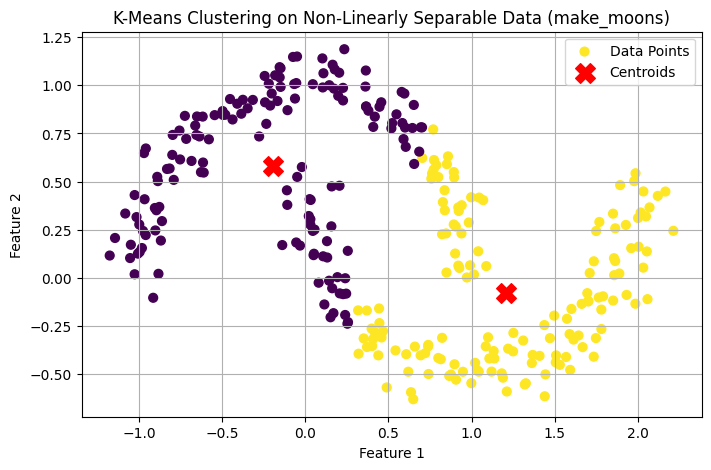

In [21]:
#39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
#clustering result.
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, _ = make_moons(
    n_samples=300,
    noise=0.08,
    random_state=42
)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 5))

# Plot data points
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap='viridis',
    s=40,
    label='Data Points'
)

# Plot cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)

plt.title("K-Means Clustering on Non-Linearly Separable Data (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


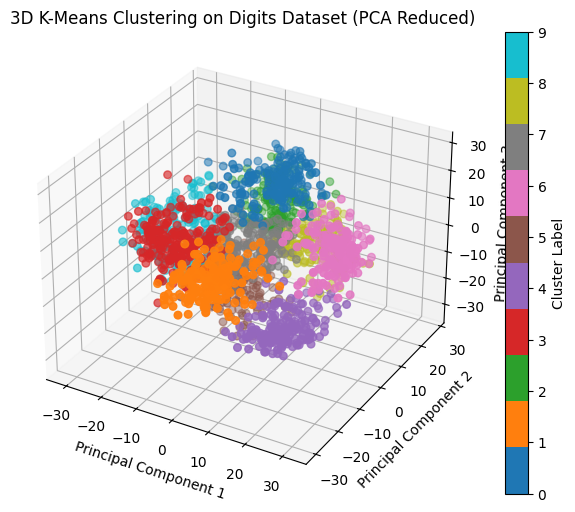

In [22]:
#40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
#scatter plot.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

digits = load_digits()
X = digits.data

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=labels,
    cmap='tab10',
    s=30
)

ax.set_title("3D K-Means Clustering on Digits Dataset (PCA Reduced)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.colorbar(scatter, ax=ax, label="Cluster Label")
plt.show()


In [23]:
#41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
#clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(
    n_samples=400,
    centers=5,
    cluster_std=1.0,
    random_state=42
)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)

print("Silhouette Score for K = 5:", score)


Silhouette Score for K = 5: 0.6771943882143446


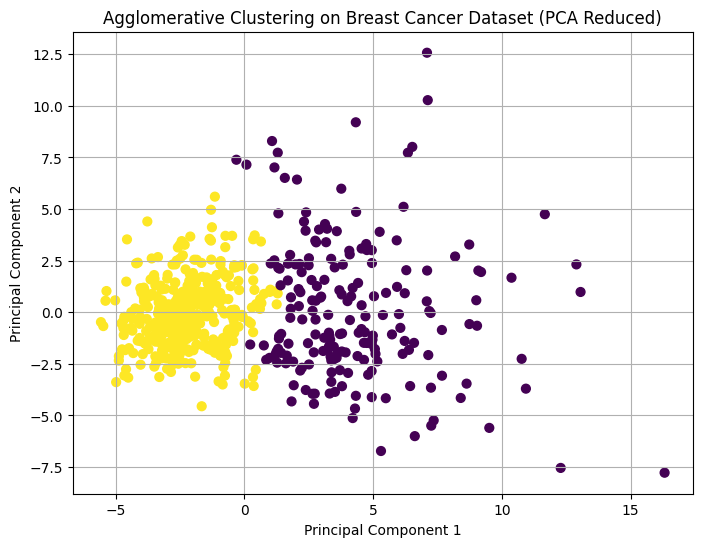

In [24]:
#42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
#Visualize in 2D
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

data = load_breast_cancer()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

agglo = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
)

labels = agglo.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap='viridis',
    s=40
)

plt.title("Agglomerative Clustering on Breast Cancer Dataset (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


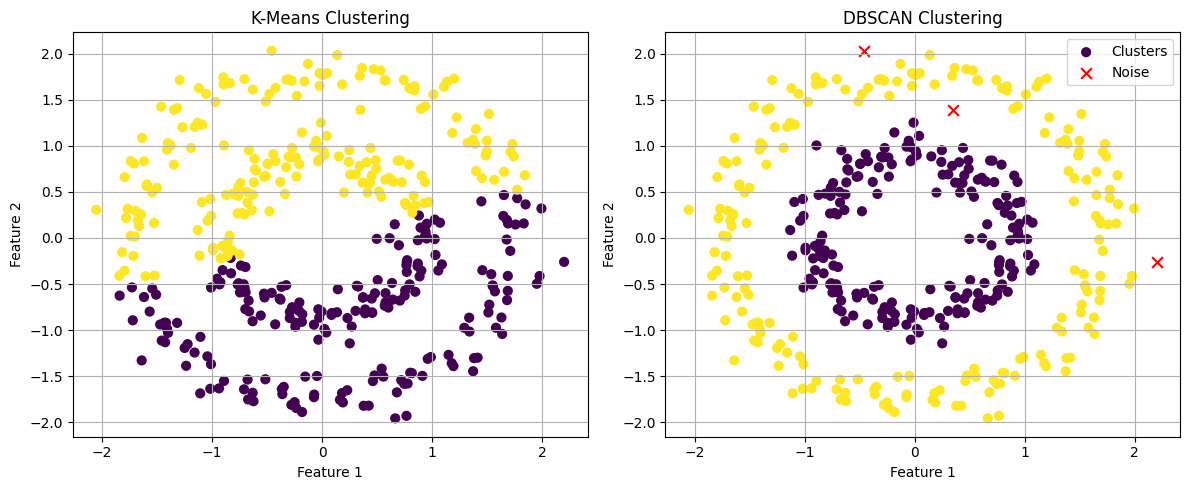

In [25]:
#43.  Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
#side-by-side.
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

X, _ = make_circles(
    n_samples=400,
    factor=0.5,
    noise=0.08,
    random_state=42
)

X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means plot
axes[0].scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=kmeans_labels,
    cmap='viridis',
    s=40
)
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].grid(True)

# DBSCAN plot
# Noise points are labeled as -1
noise = dbscan_labels == -1

axes[1].scatter(
    X_scaled[~noise, 0],
    X_scaled[~noise, 1],
    c=dbscan_labels[~noise],
    cmap='viridis',
    s=40,
    label="Clusters"
)
axes[1].scatter(
    X_scaled[noise, 0],
    X_scaled[noise, 1],
    c='red',
    marker='x',
    s=60,
    label="Noise"
)

axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


Average Silhouette Score: 0.4798814508199817


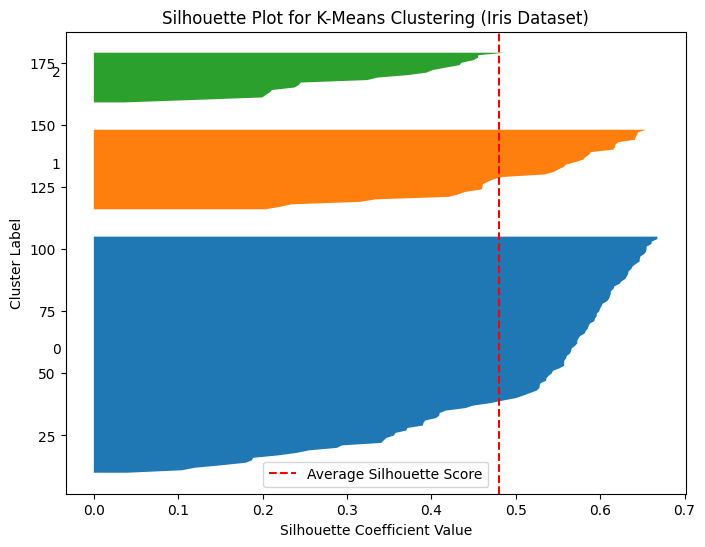

In [26]:
#44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
avg_silhouette = silhouette_score(X_scaled, cluster_labels)

print("Average Silhouette Score:", avg_silhouette)

y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(k):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=avg_silhouette, color="red", linestyle="--",
            label="Average Silhouette Score")

plt.xlabel("Silhouette Coefficient Value")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for K-Means Clustering (Iris Dataset)")
plt.legend()
plt.show()


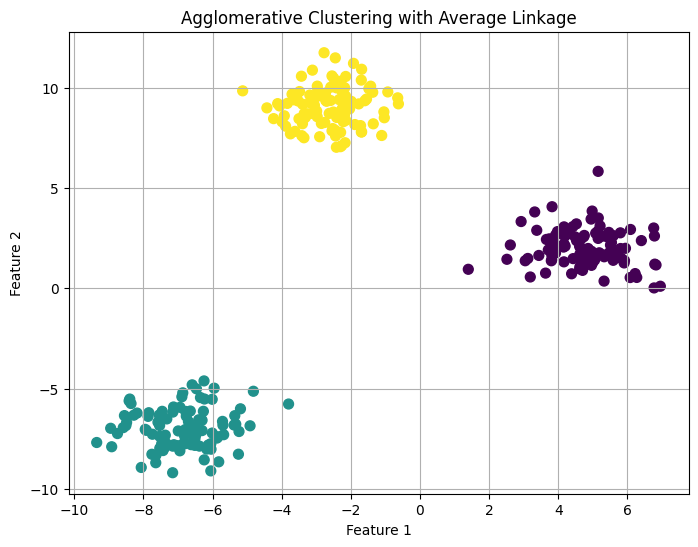

In [27]:
#45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
#Visualize clusters
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage='average'
)

labels = agglo.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap='viridis',
    s=50
)

plt.title("Agglomerative Clustering with Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


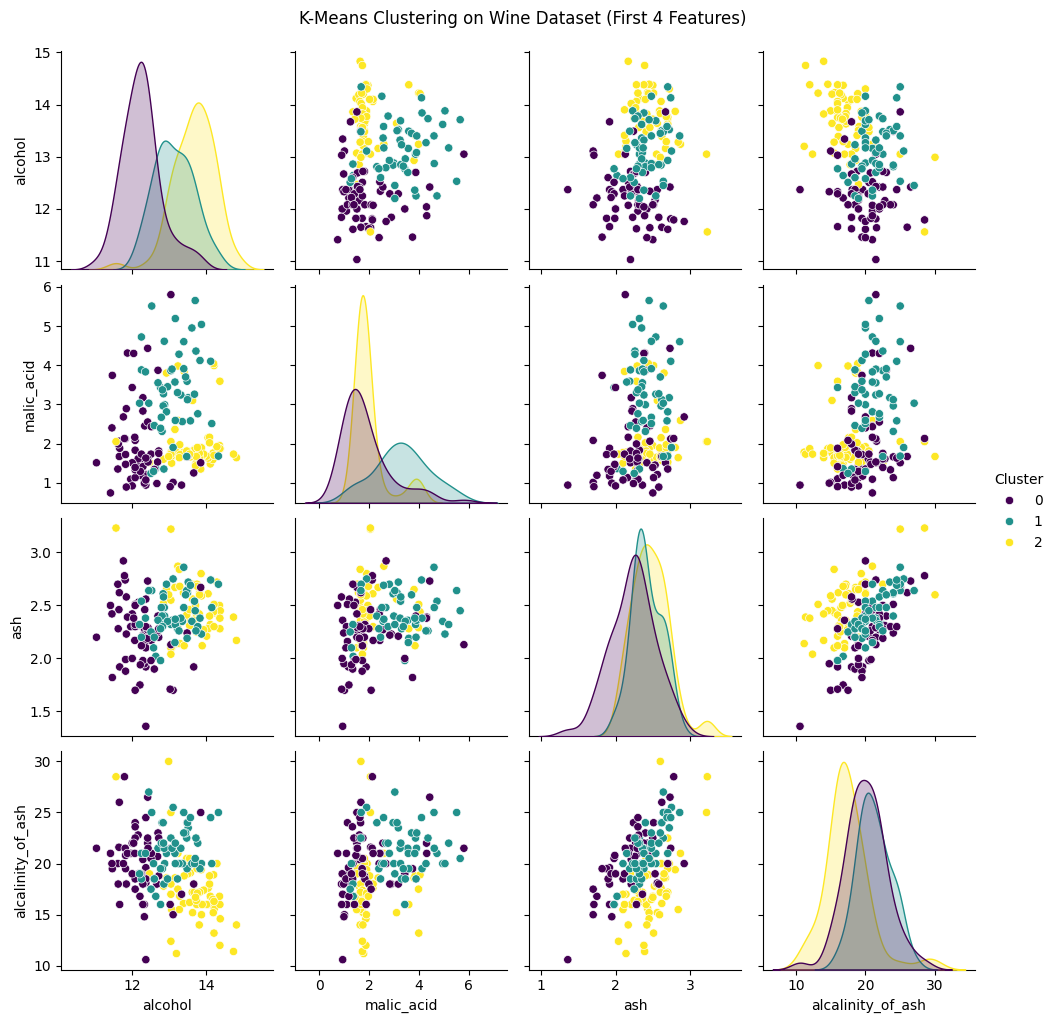

In [28]:
#46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
#features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

wine = load_wine()
X = wine.data
feature_names = wine.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

sns.pairplot(
    df,
    vars=feature_names[:4],
    hue='Cluster',
    palette='viridis',
    diag_kind='kde'
)

plt.suptitle("K-Means Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


In [29]:
#47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
#count.
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

X, _ = make_blobs(
    n_samples=400,
    centers=3,
    cluster_std=1.2,
    random_state=42
)

# Add extra noise points
noise = np.random.uniform(low=-10, high=10, size=(40, 2))
X_noisy = np.vstack((X, noise))

X_scaled = StandardScaler().fit_transform(X_noisy)

dbscan = DBSCAN(
    eps=0.35,
    min_samples=5
)

labels = dbscan.fit_predict(X_scaled)

unique_labels = set(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
num_noise = np.sum(labels == -1)

print("Number of clusters found:", num_clusters)
print("Number of noise points:", num_noise)


Number of clusters found: 3
Number of noise points: 15


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


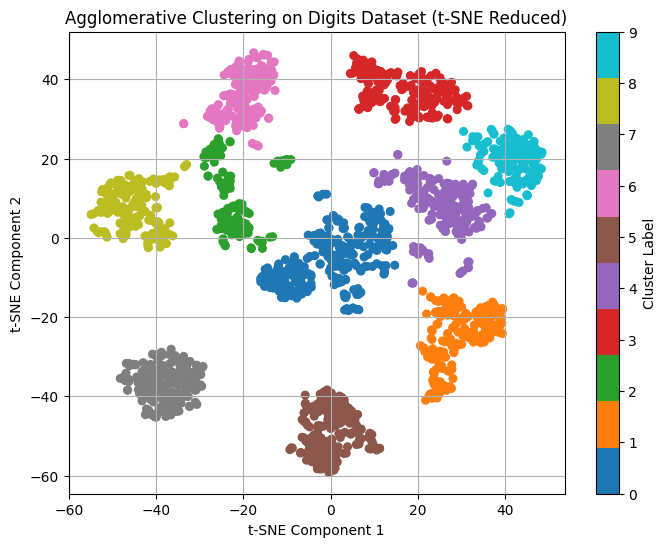

In [30]:
#48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
#clusters.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)
X_tsne = tsne.fit_transform(X_scaled)

agglo = AgglomerativeClustering(
    n_clusters=10,
    linkage='ward'
)

labels = agglo.fit_predict(X_tsne)
plt.figure(figsize=(8, 6))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=labels,
    cmap='tab10',
    s=30
)

plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()
